바닥 공사 3
문제설명
가로의 길이가 N, 세로의 길이가 3인 직사각형 형태의 얇은 바닥이 있습니다.

태일이는 이 얇은 바닥을 1 X 2 크기의 덮개와 2 X 1 크기의 덮개를 이용해 빈틈없이 딱 맞게 채우고자 합니다. 이때 얇은 바닥을 채우는 모든 경우의 수를 구하는 프로그램을 작성하세요.

해당 문제의 예시 이미지는 AIVLE-EDU의 학습자료실에서 확인하실 수 있습니다.

* AI트랙 학습자료실 18번 게시물
* DX트랙 학습자료실 17번 게시물

입출력 예
입력 #1

4

입력 #2

3

입력값 설명

첫째 줄에 N이 주어집니다. (1 ≤ N ≤ 30)

출력 #1

11

출력 #2

0

출력값 설명

첫째 줄에 3 X N 크기의 바닥을 채우는 방법의 수를 출력하세요.

# 문제접근 


기본 아이디어: DP 동적 계획법 


가로 길이가 N인 경우, dp[i]를 3 x i 크기의 바닥을 채우는 방법의 수로 정의합니다.

기본적으로 N이 홀수인 경우에는 바닥을 채울 수 없습니다. 

왜냐하면 1x2와 2x1 타일로는 짝수 크기의 공간만 채울 수 있기 때문입니다.

즉, dp[i] = 0 (i가 홀수일 때) 입니다.


N이 짝수일 때 만 타일을 채울 수 있음 



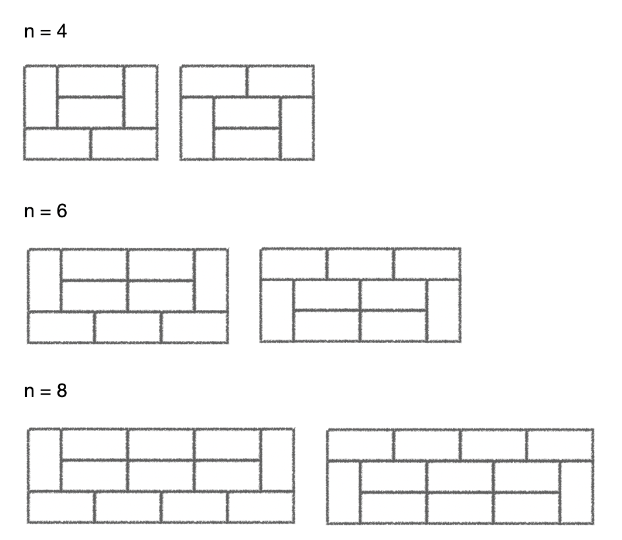

- n = 4일 때는 이전 단계(n=2)에서 2칸이 추가 되었으므로

f(4) = (이전 단계의 경우의 수) x (n = 2일 때 경우의 수) + 2        
       = f(2) x 3 + 2 = 11


n = 6일 때도 마찬가지로 이전 단계(n=4)에서 2칸이 추가되었으므로

f(6) = f(4) x 3 + 2 이라고 생각할 수 있는데, 여기에는 빠진 모양이 있다.

아래 그림을 보면 n=4일 때 나온 특수 경우가 추가되는 경우를 생각해야 한다. 이 모양은 뒤에 붙을 수도 있고 앞에 붙을 수도 있기 때문에 x2를 해 주는 것이다.


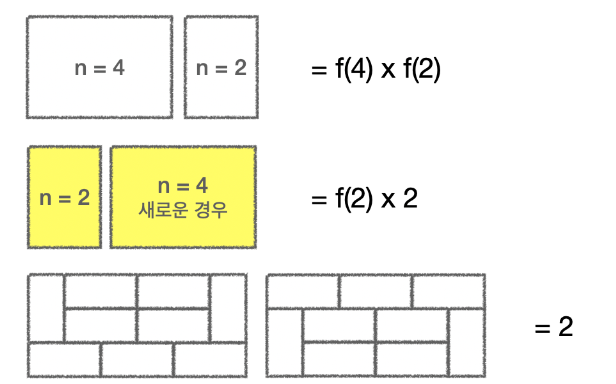


즉, f(6) = f(4) x 3 + f(2) x 2 + 2 = 41 이다.


그렇다면 n = 8인 경우에는 f(8) = f(6) x 3 + f(4) x 2 + f(2) x 2 + 2 = 153이다.



## 점화식
- dp[i] = dp[i - 2] * 3 + dp[i - 4] * 2 + dp[i - 6] * 2 + ... + dp[0] * 2

dp[i - 2] * 3는 새로운 3x2 블록을 추가하는 경우의 수입니다.
나머지 항들은 그보다 더 작은 크기의 타일로 채우는 특별한 경우입니다.

In [3]:
# 틀린 시도 
n = int(input())

dp = [0,0,3,0]

for i in range(4,n+1):
    dp.append(dp[i-2]**2 + dp[i-1] + 2) # 틀렸잖아 
    
    
print(dp[n])

0


In [ ]:
def solve_tiling_problem(n):
    # N이 홀수면 바로 0을 반환
    if n % 2 != 0:
        return 0

    # DP 테이블 초기화
    dp = [0] * (n + 1)
    
    # 초기값 설정
    dp[0] = 1  # 3x0을 채우는 방법은 1가지
    if n >= 2:
        dp[2] = 3  # 3x2을 채우는 방법은 3가지
    
    # 점화식 계산
    # dp[i] = dp[i-2] *3  + 2 * sum(dp[i-4:2]) 
    for i in range(4, n + 1, 2): # n 이 홀수이면 타일을 완성할 수 없음
        dp[i] = dp[i - 2] * 3
        for j in range(4, i + 1, 2):
            dp[i] += dp[i - j] * 2
    
    return dp[n]

# 입력 받기
n = int(input())

# 결과 출력
print(solve_tiling_problem(n))

# 프로그래머스 제출용 정답 

In [ ]:
def solution(n):
    answer = [0,3,11]
    index = int(n/2)
    if n % 2 != 0: return 0
    if index < 3: return answer[index]

    for i in range(3, index+1):
    	# answer[i:j] -> answer에서 index가 i인 원소부터 j-1인 원소까지의 sub-array
        answer.append((3*answer[i-1]+sum(answer[1:i-1])*2+2)%1000000007)

    return answer[index]